https://www.youtube.com/watch?v=jztwpsIzEGc&t=0s

Used this video as a guide on how to create a Deep Learning Model.

In [159]:
# Importing required libraries
import tensorflow as tf 
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [160]:
# Avoid OOM (Out Of Memory) errors by setting a limit on GPU Memory Consumption
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [161]:
# Printing out the GPU avalaible
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [162]:
# Taking a look at the image as a numpy array
# Making sure that the image is correct
image = cv2.imread(os.path.join("data", "siri", "Siri(1)_img.png"))
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 81,  15,  36],
        [ 86,  16,  39],
        ...,
        [  3,   0,   0],
        [  3,   0,   0],
        [  3,   0,   0]],

       [[  0,   0,   0],
        [ 86,  16,  39],
        [ 92,  17,  42],
        ...,
        [  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0]],

       ...,

       [[  0,   0,   0],
        [117,  17,  77],
        [124,  19,  82],
        ...,
        [  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0]],

       [[  0,   0,   0],
        [117,  17,  77],
        [124,  19,  82],
        ...,
        [  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0]],

       [[  0,   0,   0],
        [110,  16,  72],
        [117,  17,  77],
        ...,
        [  3,   0,   0],
        [  3,   0,   0],
        [  3,   0,   0]]

In [163]:
# Using the tf.data.Dataset API build a data pipeline
# Going to sort through and label all the data
data = tf.keras.utils.image_dataset_from_directory("data", batch_size=29)

Found 85 files belonging to 2 classes.


In [164]:
# Iterating through all the data from the data-pipeline
data_iterator = data.as_numpy_iterator()

In [165]:
# Getting a batch of the iterated data
batch = data_iterator.next()

In [166]:
# Getting all the image labes/classes
# Class 0 ==> not_siri
# Class 1 ==> siri
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0], dtype=int32)

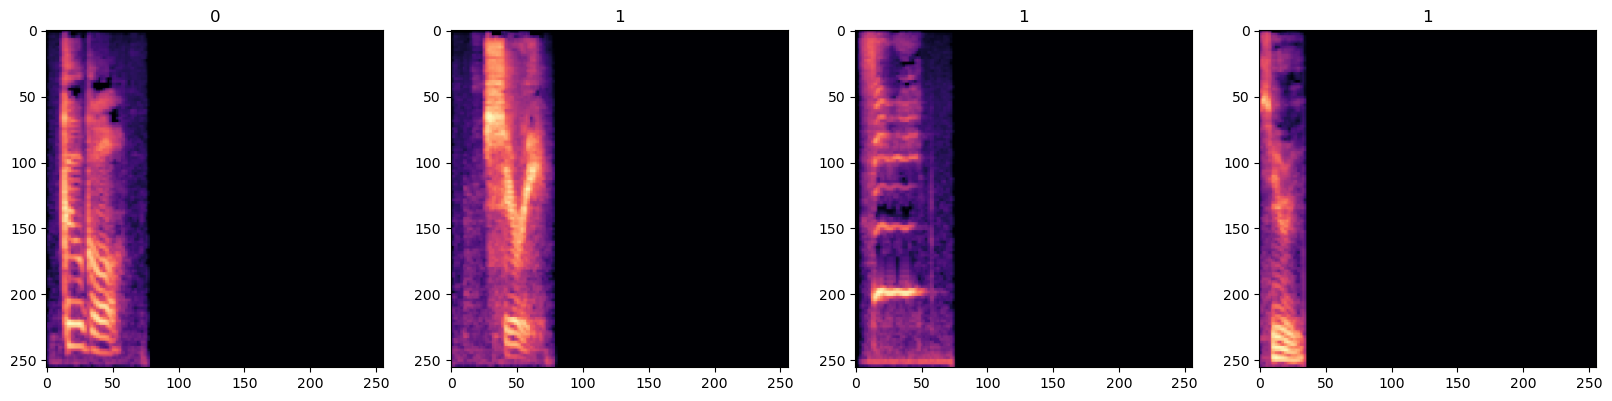

In [167]:
# Visualizing the images with their class labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [168]:
# Scaling the data
data = data.map(lambda x, y: (x/255, y))

In [169]:
# Iterating through the scaled data
scaled_iterator = data.as_numpy_iterator()

In [170]:
# Getting a batch of the scaled data
batch = scaled_iterator.next()

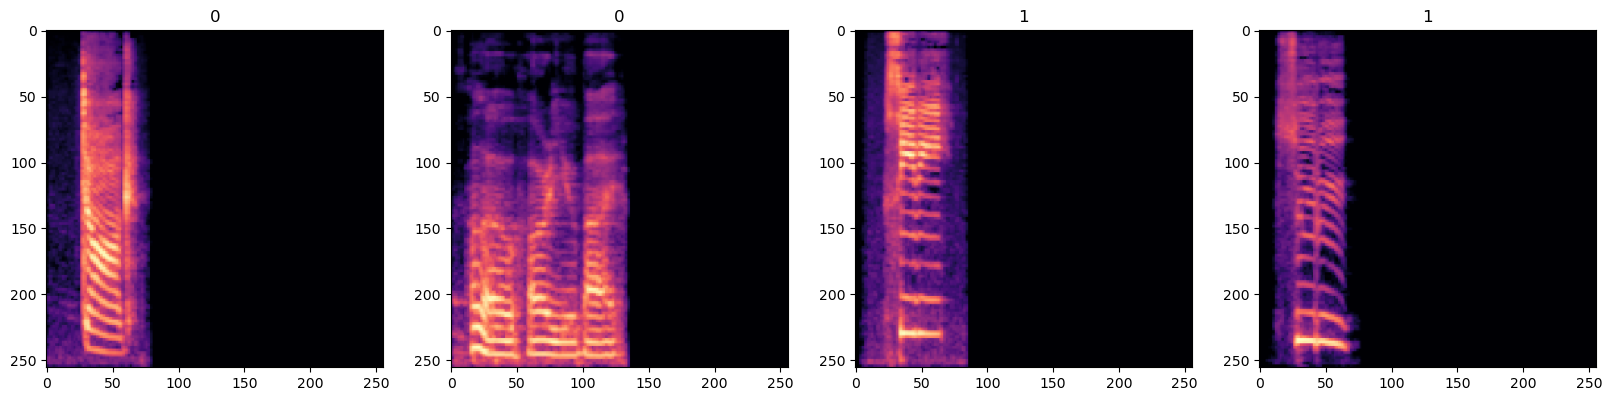

In [171]:
# Visualizing the scaled images with their class labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [172]:
len(data) # There are 3 batches of data

3

In [209]:
# Splitting up the data into testing, training and validating batches
train_size = int(len(data) * 0.7) - 1
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

In [210]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [219]:
# Resets the model ==> Only run if you want to reset the model
tf.keras.backend.clear_session()

In [220]:
# Creating the model
model = Sequential()

In [221]:
# Adding the model layers
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [222]:
# Compiling all the model layers
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [223]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Training the Model

In [224]:
logdir = "logs"

In [225]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [226]:
# Training the model
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40


2023-06-30 12:54:58.600551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 691ms/step - loss: 0.6950 - accuracy: 0.4138 - val_loss: 0.7508 - val_accuracy: 0.5517
Epoch 2/40


2023-06-30 12:54:58.946873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 193ms/step - loss: 0.8296 - accuracy: 0.4483 - val_loss: 0.6628 - val_accuracy: 0.6897
Epoch 3/40
1/1 [==============================] - 0s 189ms/step - loss: 0.6533 - accuracy: 0.7931 - val_loss: 0.7751 - val_accuracy: 0.4483
Epoch 4/40
1/1 [==============================] - 0s 183ms/step - loss: 0.5561 - accuracy: 0.7931 - val_loss: 0.9895 - val_accuracy: 0.4483
Epoch 5/40
1/1 [==============================] - 0s 183ms/step - loss: 0.8412 - accuracy: 0.5517 - val_loss: 0.7165 - val_accuracy: 0.5862
Epoch 6/40
1/1 [==============================] - 0s 181ms/step - loss: 0.8011 - accuracy: 0.5172 - val_loss: 0.7621 - val_accuracy: 0.4828
Epoch 7/40
1/1 [==============================] - 0s 185ms/step - loss: 0.7522 - accuracy: 0.4828 - val_loss: 0.6654 - val_accuracy: 0.5862
Epoch 8/40
1/1 [==============================] - 0s 176ms/step - loss: 0.6991 - accuracy: 0.4828 - val_loss: 0.6790 - val_accuracy: 0.5517
Epoch 9/40
1/1 [===============

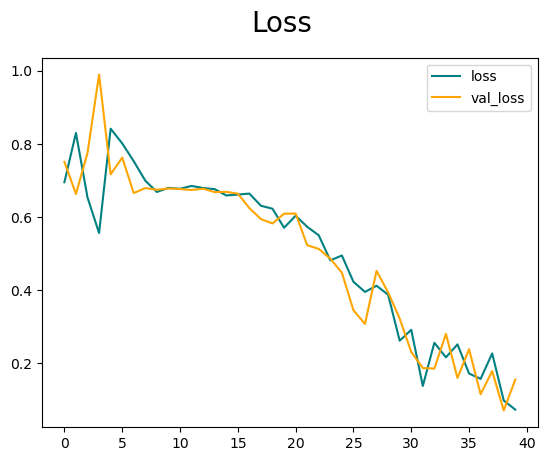

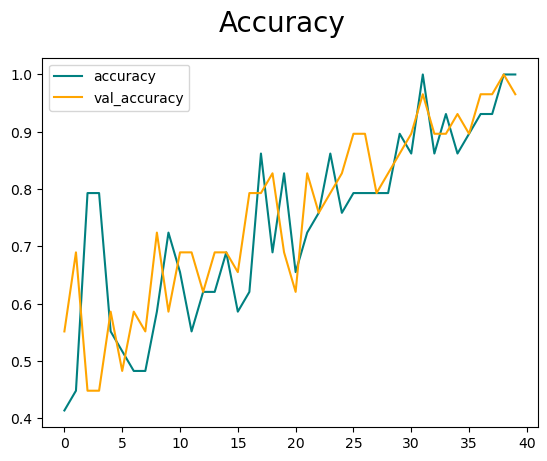

In [227]:
# Plotting the performance of the model
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [228]:
# Evaluating the model
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [229]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 72ms/step


2023-06-30 12:55:28.462315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [230]:
# On a scale from 0 to 1 ==> The higher the better
print(f"Precision: {precision.result().numpy()}")
print(f"Recall: {recall.result().numpy()}")
print(f"Accuracy: {accuracy.result().numpy()}")

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


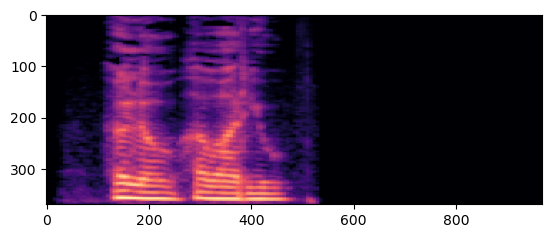

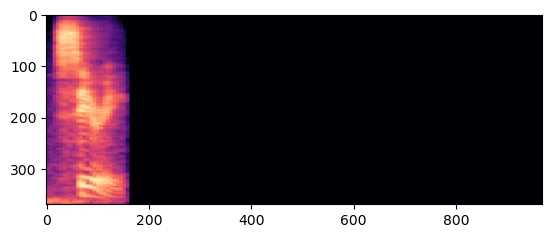

In [231]:
for file in os.listdir("test_img"):
    if not ".DS_Store" in file:
        if not ".ipynb_checkpoints" in file:
            test_image = cv2.imread(f"test_img/{file}")
            plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
            plt.show()

In [233]:
for file in os.listdir("test_img"):
    if not ".DS_Store" in file:
        if not ".ipynb_checkpoints" in file:
            test_image = cv2.imread(f"test_img/{file}")
            resize = tf.image.resize(test_image, (256, 256))
            print(f"{file[:len(file)-4]} resized shape: {resize.shape}")
            print(f"{file[:len(file)-4]} expanded dims shape: {np.expand_dims(resize, 0).shape}")
            # Passing the resized test image through the model
            yhat = model.predict(np.expand_dims(resize/255, 0))
            print(f"Predicted score of {file[:len(file)-4]}: {yhat}")
            # Class 0 is not_siri
            # Class 1 is Siri
            if yhat > 0.5:
                print(f"Prediction of {file[:len(file)-4]}: This image belongs to class Siri")
            else:
                print(f"Prediction of {file[:len(file)-4]}: This image belongs to class not_siri")
            print("------------------------------------------------------------------------------------")

Not Siri test  resized shape: (256, 256, 3)
Not Siri test  expanded dims shape: (1, 256, 256, 3)
1/1 [==============================] - 0s 12ms/step
Predicted score of Not Siri test : [[0.15109299]]
Prediction of Not Siri test : This image belongs to class not_siri
------------------------------------------------------------------------------------
Siri test  resized shape: (256, 256, 3)
Siri test  expanded dims shape: (1, 256, 256, 3)
1/1 [==============================] - 0s 9ms/step
Predicted score of Siri test : [[0.99993]]
Prediction of Siri test : This image belongs to class Siri
------------------------------------------------------------------------------------
